## Random Forest Model 

Predict whether a given customer would default or not on the credit of the bank .
Steps taken :
1. Cleaning of data .
2. Preparation of data
3. Tuning the hyperparameters.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

#### As there are no data quality issue in the dataset therefore moving onto preparation part.

### Data Preparation

In [6]:
X = df.drop(['defaulted'],axis=1)
y = df.defaulted

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Tuning 

**Default Hyper parameters**

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rfc = RandomForestClassifier()

In [11]:
rfc.fit(X_train,y_train)

/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
y_pred_def = rfc.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [14]:
print(classification_report(y_pred_def,y_test))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      8729
           1       0.33      0.60      0.42      1171

   micro avg       0.81      0.81      0.81      9900
   macro avg       0.63      0.72      0.65      9900
weighted avg       0.87      0.81      0.83      9900



In [15]:
print(confusion_matrix(y_pred_def,y_test))

[[7273 1456]
 [ 469  702]]


In [16]:
print(accuracy_score(y_pred_def,y_test))

0.8055555555555556


## Now lets See after tuning . This could be done using KFold and GridSearchCV

### Tuning Max_Depth

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [18]:
# no of folds for KFold CV
n_fold = 5

# parameters for param_grid
parameters = {
    "max_depth" : range(2,50, 5)
}

rf = RandomForestClassifier()


Grf = GridSearchCV(rf,param_grid=parameters,cv=n_fold,scoring='accuracy',return_train_score=True)

Grf.fit(X_train,y_train)

/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/skl

/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/skl

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 50, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [19]:
print(Grf.best_estimator_)
print(Grf.best_params_)
print(Grf.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'max_depth': 7}
0.8175621890547263


**Best estimators , maximum depth and best score is available now and this can be better understood with the plots below**

In [20]:
gdf = pd.DataFrame(Grf.cv_results_)
gdf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.117941,0.001888,0.006762,0.000960,2,{'max_depth': 2},0.810495,0.802039,0.799005,0.801194,...,0.802090,0.004476,10,0.807202,0.800299,0.797326,0.805982,0.796779,0.801517,0.004330
1,0.301866,0.005814,0.008898,0.000907,7,{'max_depth': 7},0.821437,0.818204,0.819652,0.816870,...,0.817562,0.003325,1,0.832825,0.833510,0.830908,0.835147,0.832597,0.832997,0.001374
2,0.467715,0.009983,0.012387,0.001199,12,{'max_depth': 12},0.812236,0.814225,0.811940,0.807912,...,0.811592,0.002050,2,0.883202,0.883637,0.879726,0.880978,0.884336,0.882376,0.001737
3,0.605277,0.011268,0.015404,0.000859,17,{'max_depth': 17},0.811987,0.808257,0.809204,0.807166,...,0.807960,0.002873,3,0.925617,0.926488,0.928296,0.928300,0.925627,0.926866,0.001212
4,0.655174,0.000921,0.016637,0.001217,22,{'max_depth': 22},0.805770,0.804775,0.810199,0.802190,...,0.805522,0.002619,6,0.960756,0.963368,0.961443,0.968907,0.960015,0.962898,0.003205


In [21]:
gdf.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

### Plotting accuracy with max_depth

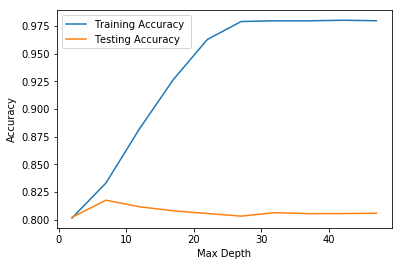

In [22]:
plt.figure()
plt.plot(gdf.param_max_depth,gdf.mean_train_score,label = 'Training Accuracy ')
plt.plot(gdf.param_max_depth,gdf.mean_test_score,label = 'Testing Accuracy ')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

**As the value of Max Depth increases the accuracy is decreasing for testing due to Overfitting;
Best max_depth value is 7**

### Tuning n_estimators 

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5
parameters = {
    'n_estimators' : range(100,1500,400)
}

rf  = RandomForestClassifier(max_depth=7)

rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [24]:
print(rf.best_estimator_)
print(rf.best_params_)
print(rf.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'n_estimators': 100}
0.8191044776119403


In [25]:
gdf_n = pd.DataFrame(rf.cv_results_)
gdf_n.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.964702,0.020073,0.075091,0.003860,100,{'n_estimators': 100},0.823427,0.819199,0.824129,0.814879,...,0.819104,0.004220,1,0.835997,0.835997,0.835759,0.836764,0.836640,0.836231,0.000396
1,15.269897,0.726057,0.355054,0.022511,500,{'n_estimators': 500},0.824173,0.820194,0.821642,0.816870,...,0.819055,0.004083,2,0.837739,0.836806,0.836132,0.837572,0.837137,0.837077,0.000575
2,27.356400,0.396926,0.655646,0.009563,900,{'n_estimators': 900},0.823427,0.820194,0.820647,0.815875,...,0.819055,0.003114,2,0.837428,0.837055,0.836816,0.838070,0.837137,0.837301,0.000431
3,43.756886,1.872009,0.952183,0.056011,1300,{'n_estimators': 1300},0.822930,0.820940,0.820896,0.816372,...,0.818955,0.003420,4,0.837925,0.836557,0.836505,0.838629,0.837634,0.837450,0.000817


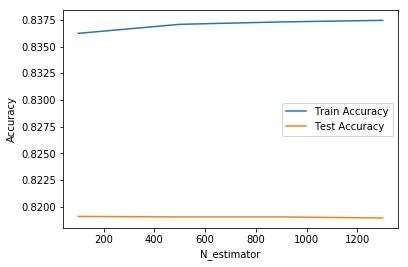

In [26]:
plt.figure()
plt.plot(gdf_n.param_n_estimators,gdf_n.mean_train_score,label='Train Accuracy')
plt.plot(gdf_n.param_n_estimators,gdf_n.mean_test_score,label='Test Accuracy')
plt.xlabel('N_estimator')
plt.ylabel('Accuracy')
plt.legend()


**Best N_estimator is 100**

### Tuning max_features

In [27]:
n_folds = 5
parameters =  {
    'max_features' : [4,8,12,16,20,24]
}

rf = RandomForestClassifier(max_depth=7)

rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)
rf.fit(X_train,y_train)

/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/skl

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 12, 16, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [28]:
print(rf.best_estimator_)
print(rf.best_params_)
print(rf.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=16, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'max_features': 16}
0.820547263681592


In [29]:
rdf = pd.DataFrame(rf.cv_results_)
rdf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.324894,0.010975,0.010944,0.002952,4,{'max_features': 4},0.822681,0.812733,0.823134,0.815875,...,0.818557,0.003978,4,0.834069,0.831333,0.833582,0.834650,0.833406,0.833408,0.001124
1,0.602622,0.020671,0.010700,0.001606,8,{'max_features': 8},0.826909,0.819448,0.819154,0.812640,...,0.818408,0.005053,5,0.835686,0.838734,0.835323,0.837634,0.838194,0.837114,0.001364
2,1.123381,0.132096,0.012845,0.002762,12,{'max_features': 12},0.823178,0.817210,0.824129,0.817368,...,0.819950,0.003047,2,0.837366,0.838672,0.839739,0.838816,0.838629,0.838644,0.000757
3,1.139323,0.034280,0.009631,0.001912,16,{'max_features': 16},0.825665,0.818204,0.823134,0.816870,...,0.820547,0.003309,1,0.840289,0.839293,0.836443,0.840806,0.839624,0.839291,0.001517
4,1.433939,0.066136,0.009143,0.000761,20,{'max_features': 20},0.825417,0.818702,0.824876,0.812889,...,0.819303,0.005133,3,0.840102,0.840911,0.836629,0.839313,0.841241,0.839639,0.001647


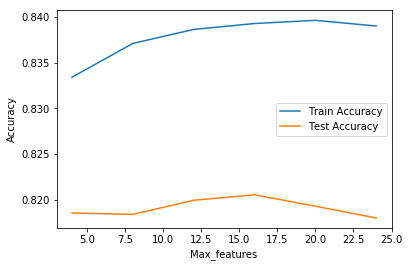

In [30]:
plt.figure()
plt.plot(rdf.param_max_features,rdf.mean_train_score,label='Train Accuracy')
plt.plot(rdf.param_max_features,rdf.mean_test_score,label='Test Accuracy')
plt.xlabel('Max_features')
plt.ylabel('Accuracy')
plt.legend()

**We have max accuracy at 16 features**

### Tuning min_sample_leaves and min_sample_split

In [31]:
n_folds = 5
parameters = {
                'min_samples_leaf':range(100,600,100),
                'min_samples_split':range(200,600,100)

    }
rf = RandomForestClassifier(max_depth=7,max_features=16)
rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)
rf.fit(X_train,y_train)

/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/skl

/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/skl

/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajay/anaconda3/lib/python3.6/site-packages/skl

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 600, 100), 'min_samples_split': range(200, 600, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [32]:
print(rf.best_estimator_)
print(rf.best_params_)
print(rf.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=400,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'min_samples_leaf': 100, 'min_samples_split': 400}
0.8201492537313433


In [33]:
rdf = pd.DataFrame(rf.cv_results_)
rdf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.193065,0.049034,0.009364,0.001722,100,200,"{'min_samples_leaf': 100, 'min_samples_split':...",0.825665,0.817956,0.820896,...,0.819055,0.003961,8,0.820325,0.823559,0.821331,0.823394,0.823705,0.822463,0.001376
1,1.144135,0.042396,0.008346,0.001582,100,300,"{'min_samples_leaf': 100, 'min_samples_split':...",0.826163,0.818204,0.824378,...,0.820100,0.004356,2,0.820262,0.820884,0.820958,0.822461,0.821964,0.821306,0.000794
2,1.140395,0.105760,0.008923,0.001752,100,400,"{'min_samples_leaf': 100, 'min_samples_split':...",0.826163,0.819697,0.822139,...,0.820149,0.003741,1,0.819330,0.820884,0.819652,0.822337,0.820409,0.820522,0.001060
3,1.119905,0.058403,0.010499,0.003905,100,500,"{'min_samples_leaf': 100, 'min_samples_split':...",0.823427,0.815717,0.821642,...,0.818557,0.003410,18,0.817837,0.819578,0.819465,0.822834,0.820782,0.820099,0.001658
4,1.121678,0.063894,0.008740,0.001998,200,200,"{'min_samples_leaf': 200, 'min_samples_split':...",0.825665,0.817956,0.821393,...,0.819353,0.003863,4,0.819392,0.819578,0.819092,0.822275,0.820907,0.820249,0.001188


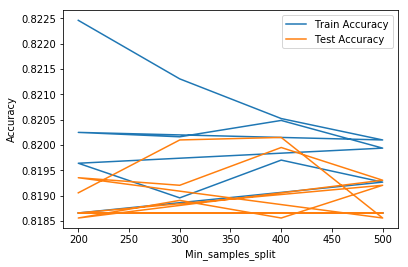

In [34]:
plt.figure()
plt.plot(rdf.param_min_samples_split,rdf.mean_train_score,label='Train Accuracy')
plt.plot(rdf.param_min_samples_split,rdf.mean_test_score,label='Test Accuracy')
plt.xlabel('Min_samples_split')
plt.ylabel('Accuracy')
plt.legend()

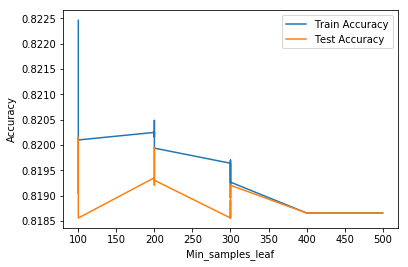

In [35]:
plt.figure()
plt.plot(rdf.param_min_samples_leaf,rdf.mean_train_score,label='Train Accuracy')
plt.plot(rdf.param_min_samples_leaf,rdf.mean_test_score,label='Test Accuracy')
plt.xlabel('Min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend()

**The best value for min_samples_leaf = 100 and min_samples_split = 400**

## Using all the above given Best Params for the RandomForestClassifier

In [39]:
# Using all the best params in the final RandomForestClassifier
rf = RandomForestClassifier(max_depth=7,max_features=16,min_samples_split=400,min_samples_leaf=100,n_estimators=100,
                            bootstrap=True)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=16, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=400,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
y_pred = rf.predict(X_test)

In [41]:
print('Classification Report')
print('\n')
print(classification_report(y_pred,y_test))
print('\n')
print('Confusion Matrix')
print('\n')
print(confusion_matrix(y_pred,y_test))
print('\n')
print('Accuracy Score')
print('\n')
print(accuracy_score(y_pred,y_test))

Classification Report


              precision    recall  f1-score   support

           0       0.95      0.84      0.89      8773
           1       0.35      0.68      0.46      1127

   micro avg       0.82      0.82      0.82      9900
   macro avg       0.65      0.76      0.68      9900
weighted avg       0.88      0.82      0.84      9900



Confusion Matrix


[[7378 1395]
 [ 364  763]]


Accuracy Score


0.8223232323232323
